In [1]:
import pyflct
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
# Creating the input arrays
image1 = np.zeros((10, 10))
image1[0:3, 0:3] = 1

image2 = np.zeros((10, 10))
image2[0:3, 1:4] = 1

In [3]:
vel_x, vel_y, vm = pyflct.flct(image1, image2, 1, 1, 2.5)

flct: nominal sliding box size = 4
flct: mean value of gamma^2/sigma^2 = -nan

flct: finished


Text(0.5, 1.0, 'Second Image')

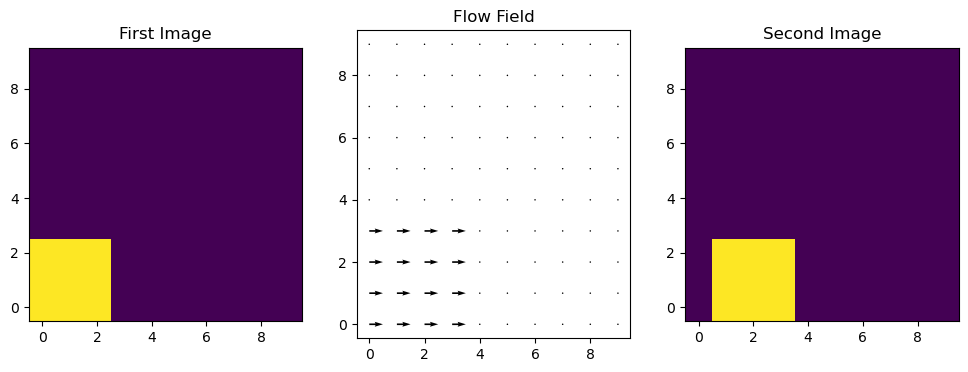

In [4]:
# But first we need to create a meshgrid on which the flow field will be plotted
X = np.arange(0, 10, 1)
Y = np.arange(0, 10, 1)
U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image1, origin="lower")
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(U, V, vel_x, vel_y, scale=20)
ax2.set_title("Flow Field")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image2, origin="lower")
ax3.set_title("Second Image")

In [5]:
print(vel_x[:4,:4])

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [6]:
# Beleske

# Zasto dobijamo 4x4 brzine kada je kvadrat 3x3? Ovo vrv ima veze sa sliding box
# Sigma Gausijana ne sme da bude manja od jednog pixela

In [7]:
# Probamo na pravim podacima: 

In [8]:
from scipy.io import readsav

In [18]:
data = readsav("../nfi_tracking.sav", python_dict=True)

In [20]:
data.keys()

dict_keys(['blong'])

In [21]:
B = data['blong']

In [22]:
B.shape

(100, 100, 100)

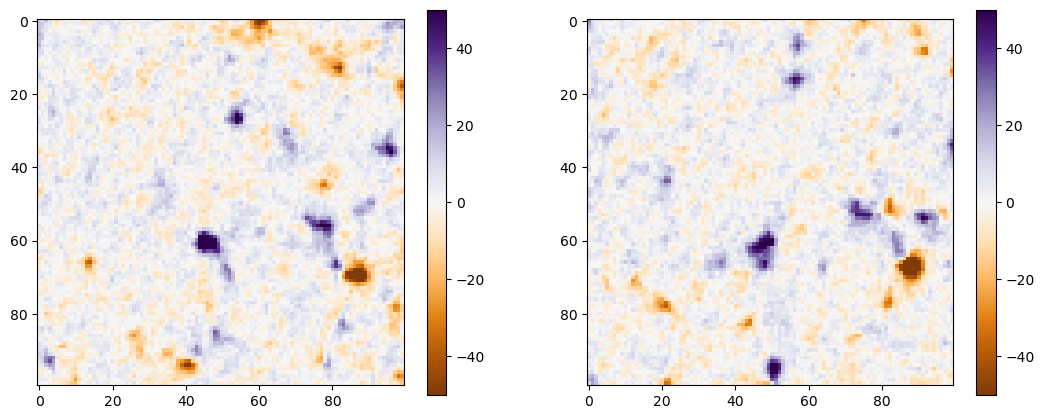

In [31]:
plt.figure(figsize=[13,5])
plt.subplot(121)
plt.imshow(B[0,:,:].T,cmap='PuOr',vmin=-50,vmax=50)
plt.colorbar()
plt.subplot(122)
plt.imshow(B[10,:,:].T,cmap='PuOr',vmin=-50,vmax=50)
plt.colorbar()

In [33]:
# Hajde da primenimo nas pyfctl na prvi i drugi 

In [40]:
image1 = B[0,:,:]
image2 = B[1,:,:]

In [46]:
i_start = 10
i_end = 40
j_start = 10
j_end = 40

In [60]:
vel_x, vel_y, vm = pyflct.flct(image1, image2, 1, 1, 5.0)

flct: nominal sliding box size = 20
flct: mean value of gamma^2/sigma^2 = 0.135837

flct: finished


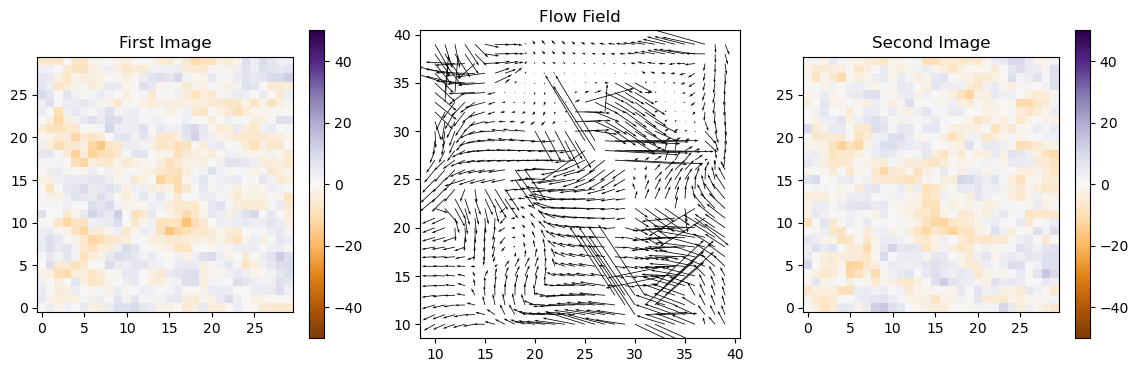

In [61]:
# But first we need to create a meshgrid on which the flow field will be plotted
X = np.arange(0, 100, 1)
Y = np.arange(0, 100, 1)
U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image1[i_start:i_end, j_start:j_end], origin="lower", cmap='PuOr',
          vmin=-50, vmax=50)
plt.colorbar()
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(U[i_start:i_end, j_start:j_end], V[i_start:i_end, j_start:j_end], \
           vel_x[i_start:i_end, j_start:j_end], vel_y[i_start:i_end, j_start:j_end], scale=20)
ax2.set_title("Flow Field")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image2[i_start:i_end, j_start:j_end], origin="lower", cmap='PuOr',\
          vmin=-50, vmax=50)
ax3.set_title("Second Image")
plt.colorbar()

In [62]:
# Isto to, samo bifrost

In [64]:
simdata = readsav("../bifrost_tracking.sav", python_dict = True)

In [65]:
simdata.keys()

dict_keys(['blong'])

In [66]:
B = simdata['blong']

In [67]:
B.shape

(242, 200, 200)

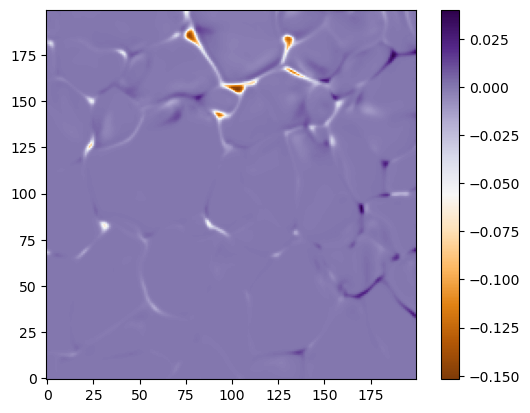

In [73]:
plt.imshow(B[0,:,:],cmap='PuOr', origin='lower')
plt.colorbar()

In [82]:
i_start = 130
i_end = 200
j_start = 60
j_end = 130

In [90]:
image1 = B[0,i_start:i_end,j_start:j_end]
image2 = B[3,i_start:i_end,j_start:j_end]

In [91]:
vel_x, vel_y, vm = pyflct.flct(image1, \
                               image2, 1, 1, 5.0)

flct: nominal sliding box size = 20
flct: mean value of gamma^2/sigma^2 = 0.296569

flct: finished


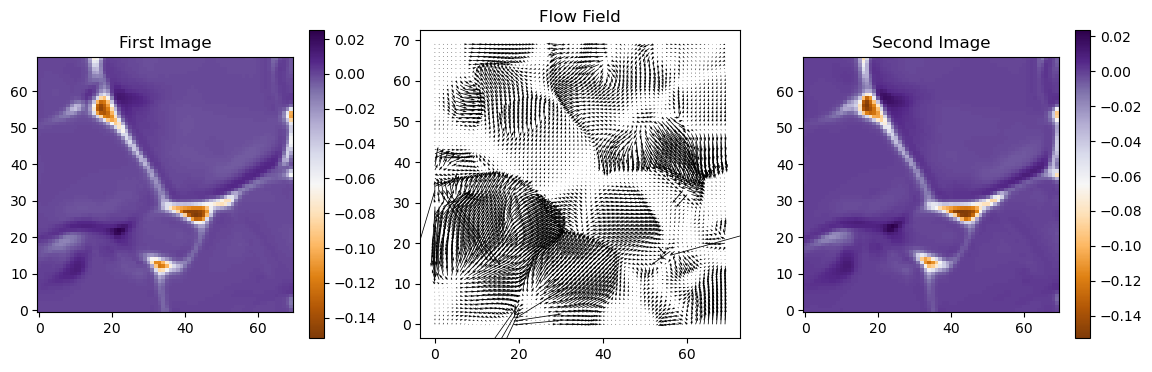

In [92]:
# But first we need to create a meshgrid on which the flow field will be plotted
X = np.arange(0, 70, 1)
Y = np.arange(0, 70, 1)
U, V = np.meshgrid(X, Y)

# Plotting the first image
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(131)
plt.imshow(image1, origin="lower", cmap='PuOr')
plt.colorbar()
ax1.set_title("First Image")

# Plot the 2D flow field
ax2 = fig.add_subplot(132)
ax2.quiver(U, V, \
           vel_x, vel_y, scale=20)
ax2.set_title("Flow Field")

# Plot the shifted image
ax3 = fig.add_subplot(133)
plt.imshow(image2, origin="lower", cmap='PuOr')
ax3.set_title("Second Image")
plt.colorbar()